In [0]:
%matplotlib inline
import numpy as np
from scipy.stats import gamma, norm, beta, chi, f
import matplotlib.pyplot as plt

https://drive.google.com/open?id=1kqjxeke9ovXSzTF283V6THSEusbsjwxS

ЦПТ для другого распределения, доработать бутстреп и понять интервалы (презы прочитать, пересмотреть).

## Центральная предельная теорема

# Для $\chi^2$

In [0]:
chi.rvs(df=2, size=10)

array([0.5522119 , 2.13978602, 0.99859817, 2.02590833, 1.2429163 ,
       1.12554651, 2.82571083, 2.04485868, 0.4642375 , 1.37575977])

Посчитать mean с заданным их кол-вом, нарисовать гистограмму и построить нормальное распр-е со средним, равным а, и дисперсией, равной $а/sqrt(N)$.

In [0]:
def check_chi(df, size):
  sample_mean = np.zeros(1000)
  for i in range(1000):
    sample_mean[i] = np.mean(chi.rvs(df, size=size))
  #means = [np.mean(gamma.rvs(a)) for i in size]
  plt.hist(sample_mean, density=True)#, range=(0.01, 0.99))
  a = chi.mean(df)
  #a = np.mean(sample_mean)
  start = norm.ppf(0.01, loc=a, scale=np.sqrt(a))
  end = norm.ppf(0.99, loc=a, scale=np.sqrt(a))
  x = np.linspace(start, end, 100)
  y = norm.pdf(x, loc=a, scale=np.sqrt(a / size))
  plt.plot(x, y, 'r', marker='.')

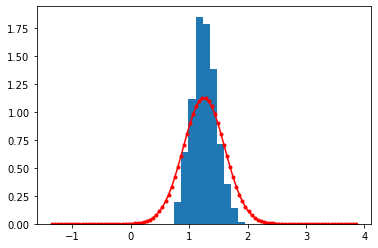

In [0]:
check_chi(2, 10)

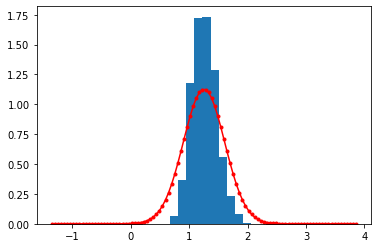

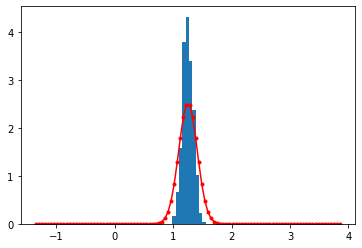

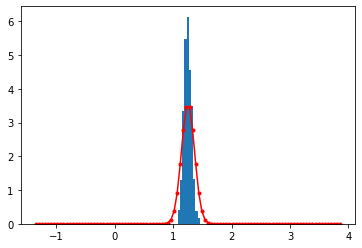

In [0]:
plt.subplots(); check_chi(2, 10)
plt.subplots(); check_chi(2, 50)
plt.subplots(); check_chi(2, 100)

# Для $\beta$

In [0]:
beta.rvs(a=2, b=1, size=10)

array([0.4897348 , 0.6757645 , 0.42799587, 0.84583478, 0.74367703,
       0.50450506, 0.83600827, 0.90073998, 0.59650251, 0.70301866])

In [0]:
def check_beta(a, b, size):
  sample_mean = np.zeros(1000)
  for i in range(1000):
    sample_mean[i] = np.mean(beta.rvs(a, b, size=size))
  #means = [np.mean(gamma.rvs(a)) for i in size]
  plt.hist(sample_mean, density=True)#, range=(0.01, 0.99))
  mean_a = np.mean(sample_mean)
  start = norm.ppf(0.01, loc=mean_a, scale=np.sqrt(mean_a))
  end = norm.ppf(0.99, loc=mean_a, scale=np.sqrt(mean_a))
  x = np.linspace(start, end, 100)
  y = norm.pdf(x, loc=mean_a, scale=np.sqrt(mean_a / size))
  plt.plot(x, y, 'r', marker='.')

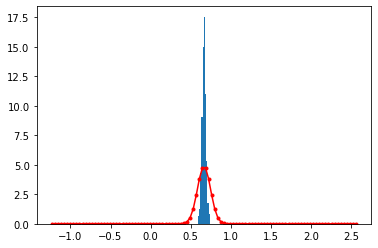

In [0]:
check_beta(2, 1, 100)

# Для Фишера

In [0]:
f.rvs(dfn=2, dfd=100, size=10)

array([1.41894083, 1.44542883, 3.30290345, 2.80994261, 0.45819563,
       0.26708556, 0.36317599, 0.82058511, 2.86455752, 2.56980297])

In [0]:
def check_f(dfn, dfd, size):
  sample_mean = np.zeros(1000)
  for i in range(1000):
    sample_mean[i] = np.mean(beta.rvs(dfn, dfd, size=size))
  #means = [np.mean(gamma.rvs(a)) for i in size]
  plt.hist(sample_mean, density=True)#, range=(0.01, 0.99))
  mean_a = np.mean(sample_mean)
  #mean_std = np.std(sample_mean)
  start = norm.ppf(0.01, loc=mean_a, scale=np.sqrt(mean_a))
  end = norm.ppf(0.99, loc=mean_a, scale=np.sqrt(mean_a))
  x = np.linspace(start, end, 100)
  y = norm.pdf(x, loc=mean_a, scale=np.sqrt(mean_a / size))
  plt.plot(x, y, 'r', marker='.')

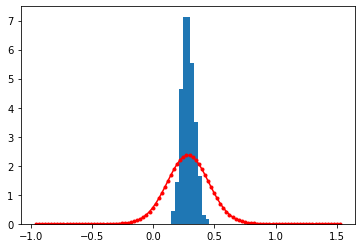

In [0]:
check_f(2, 5, 10)

Плохо выглядит, ну да ладно.

# В классе что делали

In [0]:
norm.pdf(0, 1)

0.24197072451914337

In [0]:
def draw_gamma(a, size):
  start = gamma.ppf(0.01, a)
  end = gamma.ppf(0.99, a)
  x = np.linspace(start, end, 100)
  sample = gamma.rvs(a=a, size=size)
  y = gamma.pdf(x, a)
  plt.plot(x, y, 'r', marker='.')
  plt.hist(sample, density=True, range=(start, end), bins=100)

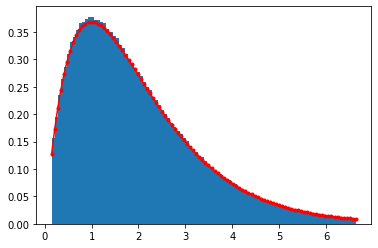

In [0]:
draw_gamma(2, 1000000)

Почти совпадают!

In [0]:
gamma.ppf(0.99, 2)

6.638352067993811

PPF отвечает на вопрос, в какой точке находится 99% (или заданное число) значений.

In [0]:
gamma.ppf(0.01, 2)

0.14855474025326595

# Бутстреп

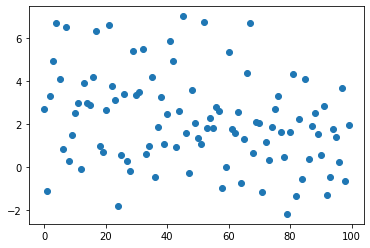

In [0]:
sample = norm.rvs(loc=2, scale=2, size=100)
plt.plot(sample, 'o', ls='none')

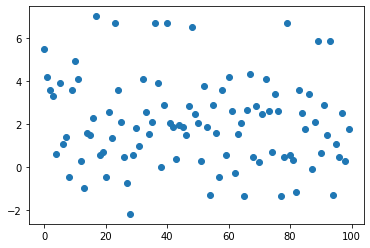

In [0]:
pseudo_samples = [np.random.choice(sample, size=len(sample)) for i in range(1000)]
plt.plot(pseudo_samples[0], 'o', ls='none')

In [0]:
len(pseudo_samples)

1000

In [0]:
pseudo_means = [np.mean(p_s) for p_s in pseudo_samples]
len(pseudo_means)

1000

In [0]:
np.percentile(pseudo_means, [0.025, 0.975])

array([1.52349227, 1.72666422])

Среднее довольно сильно отличается от выставленного нами - так сгенерились данные.

In [0]:
from statsmodels.stats.weightstats import _tconfint_generic, _zconfint_generic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
np.mean(sample)

2.174107697105587

In [0]:
np.std(sample)

2.1154646782135718

In [0]:
_zconfint_generic(np.mean(sample), np.sqrt(4 / 1000), 0.05, 'two-sided')

(2.0501486906446744, 2.2980667035664992)

In [0]:
_tconfint_generic(np.mean(sample), (np.std(sample) / np.sqrt(len(sample))), 999, 0.05, 'two-sided')

(1.7589812923434047, 2.5892341018677687)

Вот и наше среднее попало в интервал.